## 1차원 conv

In [50]:
import tensorflow as tf
from sklearn.datasets import load_iris
data = load_iris()

In [51]:
x = data['data']
y = data['target']

In [58]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, Dense, Flatten, Input
from tensorflow.keras.utils import to_categorical

In [53]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(x)
x_std = std.transform(x)

In [54]:
y_categorical = to_categorical(y)

In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_std, y_categorical, test_size = 0.2, random_state = 42, shuffle = True)

In [56]:
x_train = x_train.reshape(120,4,1)
x_test = x_test.reshape(30,4,1)

In [59]:
def create_cnn1d(input_shape, num_class = 3):
    inputs = Input(shape = input_shape)
    x = Conv1D(filters = 10, kernel_size = 4, activation = 'sigmoid')(inputs)
    x = Dense(units = num_class, activation = 'softmax')(x)
    outputs = Flatten()(x)
    model = Model(inputs = inputs, outputs = outputs)
    
    return model
model = create_cnn1d(input_shape = (4,1))
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4, 1)]            0         
_________________________________________________________________
conv1d (Conv1D)              (None, 1, 10)             50        
_________________________________________________________________
dense (Dense)                (None, 1, 3)              33        
_________________________________________________________________
flatten (Flatten)            (None, 3)                 0         
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________


In [60]:
from tensorflow.keras.optimizers import RMSprop
rms = RMSprop(learning_rate=0.01)
model.compile(optimizer=rms, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [63]:
from tensorflow.keras.callbacks import TensorBoard
import os
if not os.path.isdir('./log/20210927_1/'):
    os.mkdir('./log/20210927_1/')
tensorboard = TensorBoard(log_dir = './log/20210927_1/')

model.fit(x_train, y_train, epochs=10, batch_size = 1, callbacks=[tensorboard], verbose = 2)

Epoch 1/10
120/120 - 0s - loss: 0.0788 - accuracy: 0.9667
Epoch 2/10
120/120 - 0s - loss: 0.0731 - accuracy: 0.9667
Epoch 3/10
120/120 - 0s - loss: 0.0776 - accuracy: 0.9750
Epoch 4/10
120/120 - 0s - loss: 0.0751 - accuracy: 0.9667
Epoch 5/10
120/120 - 0s - loss: 0.0716 - accuracy: 0.9667
Epoch 6/10
120/120 - 0s - loss: 0.0554 - accuracy: 0.9750
Epoch 7/10
120/120 - 0s - loss: 0.0777 - accuracy: 0.9667
Epoch 8/10
120/120 - 0s - loss: 0.0666 - accuracy: 0.9667
Epoch 9/10
120/120 - 0s - loss: 0.0617 - accuracy: 0.9667
Epoch 10/10
120/120 - 0s - loss: 0.0694 - accuracy: 0.9750


In [64]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 253ms/step - loss: 0.0528 - accuracy: 0.9667


[0.052771423012018204, 0.9666666388511658]

# mnist conv

In [1]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [2]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPool2D, BatchNormalization, Dropout, Input
from tensorflow.keras.optimizers import RMSprop, Adam

In [3]:
def mnist_conv(input_shape = (28,28,1), target_class = 10):
    inputs = Input(shape = input_shape)
    x = Conv2D(filters = 16, kernel_size = (3,3), strides = (1,1), padding = 'valid', activation = 'relu')(inputs)
    x = BatchNormalization()(x)
    x = MaxPool2D()(x)
    
    x = Conv2D(filters = 32, kernel_size = (3,3), strides = (1,1), padding = 'valid', activation = 'relu')(inputs)
    x = MaxPool2D()(x)
    x = Dropout(rate = 0.2)(x)
    
    x = Flatten()(x)
    outputs = Dense(units = target_class, activation = 'softmax')(x)
    
    model = Model(inputs = inputs, outputs = outputs)
    
    return model

mnist_huhu = mnist_conv(input_shape = (28,28,1), target_class=10)
mnist_huhu.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________

In [4]:
x_train.shape

(60000, 28, 28, 1)

In [5]:
x_test.shape

(10000, 28, 28, 1)

In [8]:
from tensorflow.keras.optimizers import RMSprop
rms = RMSprop(learning_rate=0.01)
mnist_huhu.compile(optimizer=rms, loss = 'categorical_crossentropy', metrics = ['accuracy'])

from tensorflow.keras.callbacks import TensorBoard
import os
if not os.path.isdir('./log/20210927_2/'):
    os.mkdir('./log/20210927_2/')
tb = TensorBoard(log_dir = './log/20210927_2/')
mnist_huhu.fit(x_train, y_train, epochs=200, batch_size = 200, validation_split=0.2, callbacks=[tb], verbose = 2)

Epoch 1/200
240/240 - 3s - loss: 0.2124 - accuracy: 0.9341 - val_loss: 0.0824 - val_accuracy: 0.9773
Epoch 2/200
240/240 - 1s - loss: 0.0770 - accuracy: 0.9764 - val_loss: 0.0723 - val_accuracy: 0.9790
Epoch 3/200
240/240 - 1s - loss: 0.0595 - accuracy: 0.9815 - val_loss: 0.0852 - val_accuracy: 0.9743
Epoch 4/200
240/240 - 1s - loss: 0.0486 - accuracy: 0.9849 - val_loss: 0.0698 - val_accuracy: 0.9799
Epoch 5/200
240/240 - 1s - loss: 0.0426 - accuracy: 0.9872 - val_loss: 0.0657 - val_accuracy: 0.9807
Epoch 6/200
240/240 - 1s - loss: 0.0392 - accuracy: 0.9879 - val_loss: 0.0677 - val_accuracy: 0.9822
Epoch 7/200
240/240 - 1s - loss: 0.0366 - accuracy: 0.9892 - val_loss: 0.0712 - val_accuracy: 0.9820
Epoch 8/200
240/240 - 1s - loss: 0.0322 - accuracy: 0.9903 - val_loss: 0.0737 - val_accuracy: 0.9822
Epoch 9/200
240/240 - 1s - loss: 0.0305 - accuracy: 0.9905 - val_loss: 0.0791 - val_accuracy: 0.9822
Epoch 10/200
240/240 - 1s - loss: 0.0280 - accuracy: 0.9913 - val_loss: 0.0771 - val_accura

In [13]:
import numpy as np
import tensorflow as tf

y_pred = mnist_huhu.predict(x_test)
y_label = np.argmax(y_pred, axis = 1)

tf.math.confusion_matrix(np.argmax(y_test, axis = 1), y_label)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 975,    0,    1,    0,    0,    0,    2,    1,    1,    0],
       [   0, 1132,    1,    1,    0,    0,    1,    0,    0,    0],
       [   1,    5, 1010,    1,    1,    0,    2,    7,    5,    0],
       [   0,    1,    3,  999,    0,    4,    0,    0,    2,    1],
       [   0,    1,    0,    0,  973,    0,    1,    1,    0,    6],
       [   1,    0,    0,    8,    0,  879,    3,    0,    1,    0],
       [   7,    3,    0,    1,    2,    3,  940,    0,    2,    0],
       [   0,    8,   12,    1,    0,    0,    0, 1002,    1,    4],
       [   4,    1,    3,    2,    0,    1,    3,    2,  957,    1],
       [   4,    3,    0,    4,    8,    3,    0,    8,    2,  977]])>

In [14]:
mnist_huhu.evaluate(x_train, y_train)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0761 - accuracy: 0.9967


[0.0760510042309761, 0.9967166781425476]

In [16]:
mnist_huhu.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3280 - accuracy: 0.9844


[0.3280166983604431, 0.9843999743461609]

C:\Users\JaeYoungCho\anaconda3\envs\AI_Study\lib\site-packages\matplotlib\text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


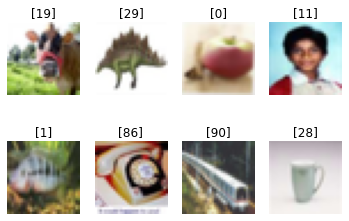

In [37]:
from tensorflow.keras.datasets import cifar100
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(x_train[i])
    plt.axis('off')
    title = y_train[i]
    plt.gca().set_title(title)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

def normalize(image):
    mean = np.mean(image, axis = (0,1,2))
    std = np.std(image, axis = (0,1,2))
    image = (image - mean) / std
    return image

x_train = normalize(x_train)
x_test = normalize(x_test)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [38]:
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, BatchNormalization, Dropout, MaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import TensorBoard
import os

In [42]:
def cifar_100_cnn(input_shape = (32,32,3), target_class = 100):
    inputs = Input(shape = input_shape)
    x = Conv2D(filters = 16, kernel_size = (3,3), padding = 'same', activation = 'relu')(inputs)
    x = BatchNormalization()(x)
    x = MaxPool2D()(x)
    
    x = Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = 'relu')(x)
    x = BatchNormalization()(x)
    x = MaxPool2D()(x)
    x = Dropout(rate = 0.25)(x)
    
    x = Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu')(x)
    x = BatchNormalization()(x)
    x = MaxPool2D()(x)
    x = Dropout(rate=0.5)(x)
    
    x = Flatten()(x)
    outputs = Dense(units = target_class, activation = 'softmax')(x)
    
    model = Model(inputs= inputs, outputs = outputs)

    return model

cifar100_hihi = cifar_100_cnn()
cifar100_hihi.compile(optimizer=rms, loss = 'categorical_crossentropy', metrics = ['accuracy'])

if not os.path.isdir('./log/20210927_4'):
    os.mkdir('./log/20210927_4')

tb = TensorBoard(log_dir = './log/20210927_4')

cifar100_hihi.fit(x_train, y_train, epochs=100, batch_size=400, validation_data = (x_test, y_test), callbacks=[tb], verbose=2)

Epoch 1/100
125/125 - 2s - loss: 5.2878 - accuracy: 0.1085 - val_loss: 3.5779 - val_accuracy: 0.1703
Epoch 2/100
125/125 - 2s - loss: 3.2551 - accuracy: 0.2222 - val_loss: 3.1090 - val_accuracy: 0.2519
Epoch 3/100
125/125 - 2s - loss: 2.9218 - accuracy: 0.2846 - val_loss: 2.8238 - val_accuracy: 0.3120
Epoch 4/100
125/125 - 2s - loss: 2.7422 - accuracy: 0.3202 - val_loss: 2.7220 - val_accuracy: 0.3461
Epoch 5/100
125/125 - 2s - loss: 2.6341 - accuracy: 0.3418 - val_loss: 2.5184 - val_accuracy: 0.3649
Epoch 6/100
125/125 - 2s - loss: 2.5434 - accuracy: 0.3586 - val_loss: 2.5922 - val_accuracy: 0.3583
Epoch 7/100
125/125 - 2s - loss: 2.4904 - accuracy: 0.3695 - val_loss: 2.3631 - val_accuracy: 0.4040
Epoch 8/100
125/125 - 2s - loss: 2.4414 - accuracy: 0.3801 - val_loss: 2.4204 - val_accuracy: 0.3872
Epoch 9/100
125/125 - 2s - loss: 2.3943 - accuracy: 0.3918 - val_loss: 2.3337 - val_accuracy: 0.4046
Epoch 10/100
125/125 - 2s - loss: 2.3596 - accuracy: 0.3967 - val_loss: 2.2056 - val_accura

In [43]:
y_pred = cifar100_hihi.predict(x_train)
y_label = np.argmax(y_pred, axis = 1)

In [47]:
tf.math.confusion_matrix(np.argmax(y_train,axis = 1),y_label)

<tf.Tensor: shape=(100, 100), dtype=int32, numpy=
array([[459,   0,   1, ...,   0,   0,   0],
       [  3, 415,   0, ...,   1,   0,   0],
       [  4,   6, 269, ...,   5,   8,   1],
       ...,
       [  0,   2,   0, ..., 378,   0,   0],
       [  3,   0,  19, ...,   2, 226,   0],
       [  1,   2,   2, ...,   3,   0, 273]])>

In [48]:
cifar100_hihi.evaluate(x_train, y_train)

1563/1563 [==============================] - 4s 2ms/step - loss: 1.3224 - accuracy: 0.6520


[1.32241690158844, 0.6520199775695801]

In [49]:
cifar100_hihi.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.8902 - accuracy: 0.5040


[1.8902223110198975, 0.5040000081062317]